Maximum in domain: 0.9994862162006879
Maximum on boundaries and initial condition: 0.9994862162006879
Maximum Principle satisfied.


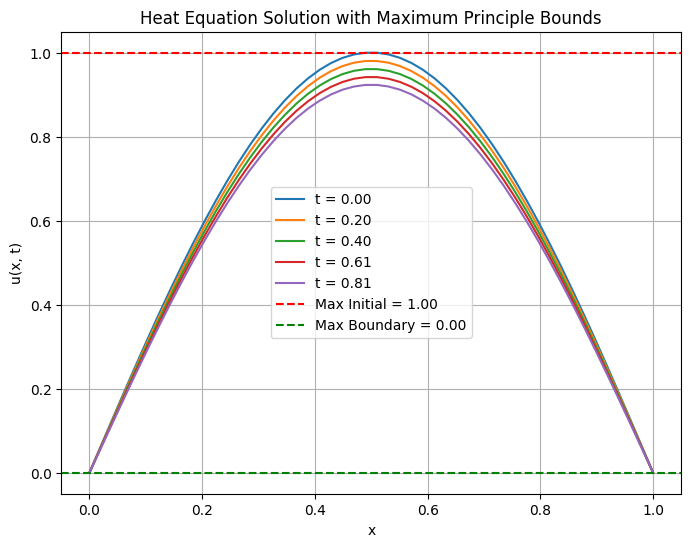

In [3]:
## Maximum principle

import numpy as np
import matplotlib.pyplot as plt

def solve_heat_equation(L=1.0, T=1.0, alpha=0.01, nx=50, nt=100, u0=None, boundary_conditions=(0, 0)):
    """
    Solve the 1D heat equation numerically using the finite difference method.

    Parameters:
        L (float): Length of the rod.
        T (float): Total simulation time.
        alpha (float): Thermal diffusivity.
        nx (int): Number of spatial points.
        nt (int): Number of time steps.
        u0 (function): Initial condition function f(x). If None, defaults to u(x, 0) = sin(pi * x).
        boundary_conditions (tuple): Dirichlet boundary conditions (u(0, t), u(L, t)).

    Returns:
        x (ndarray): Spatial grid points.
        t (ndarray): Time grid points.
        u (ndarray): Solution array of shape (nt, nx).
    """
    dx = L / (nx - 1)
    dt = T / (nt - 1)
    r = alpha * dt / dx**2

    if r > 0.5:
        raise ValueError("The solution is unstable. Choose smaller dt or larger dx.")

    x = np.linspace(0, L, nx)
    t = np.linspace(0, T, nt)
    u = np.zeros((nt, nx))

    # Initial condition
    if u0 is None:
        u[0, :] = np.sin(np.pi * x)
    else:
        u[0, :] = u0(x)

    # Boundary conditions
    u[:, 0] = boundary_conditions[0]  # u(0, t)
    u[:, -1] = boundary_conditions[1]  # u(L, t)

    for n in range(0, nt - 1):
        for i in range(1, nx - 1):
            u[n + 1, i] = u[n, i] + r * (u[n, i - 1] - 2 * u[n, i] + u[n, i + 1])

    return x, t, u

def verify_maximum_principle(u, x, t, u0=None, boundary_conditions=(0, 0)):
    """
    Verify the Maximum Principle for the heat equation solution.

    Parameters:
        u (ndarray): Solution array of shape (nt, nx).
        x (ndarray): Spatial grid points.
        t (ndarray): Time grid points.
        u0 (function): Initial condition function f(x).
        boundary_conditions (tuple): Boundary conditions (u(0, t), u(L, t)).
    """
    max_initial = np.max(u[0, :])  # Maximum at t = 0
    max_boundary = max(boundary_conditions)  # Maximum on spatial boundaries

    max_interior = np.max(u)  # Maximum in the entire domain
    max_allowed = max(max_initial, max_boundary)

    print(f"Maximum in domain: {max_interior}")
    print(f"Maximum on boundaries and initial condition: {max_allowed}")

    if max_interior > max_allowed:
        print("Maximum Principle violated!")
    else:
        print("Maximum Principle satisfied.")

# Example: Solve and verify Maximum Principle
L = 1.0
T = 1.0
alpha = 0.01
nx = 50
nt = 100

# Solve heat equation with default initial condition and zero boundary conditions
x, t, u = solve_heat_equation(L=L, T=T, alpha=alpha, nx=nx, nt=nt, boundary_conditions=(0, 0))

verify_maximum_principle(u, x, t)

# Plot the solution with Maximum Principle bounds
plt.figure(figsize=(8, 6))
for n in range(0, nt, max(1, nt // 5)):
    plt.plot(x, u[n, :], label=f"t = {t[n]:.2f}")

max_initial = np.max(u[0, :])
max_boundary = max(0, 0)
max_allowed = max(max_initial, max_boundary)

plt.axhline(max_initial, color='red', linestyle='--', label=f"Max Initial = {max_initial:.2f}")
plt.axhline(max_boundary, color='green', linestyle='--', label=f"Max Boundary = {max_boundary:.2f}")

plt.title("Heat Equation Solution with Maximum Principle Bounds")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.grid(True)
plt.show()

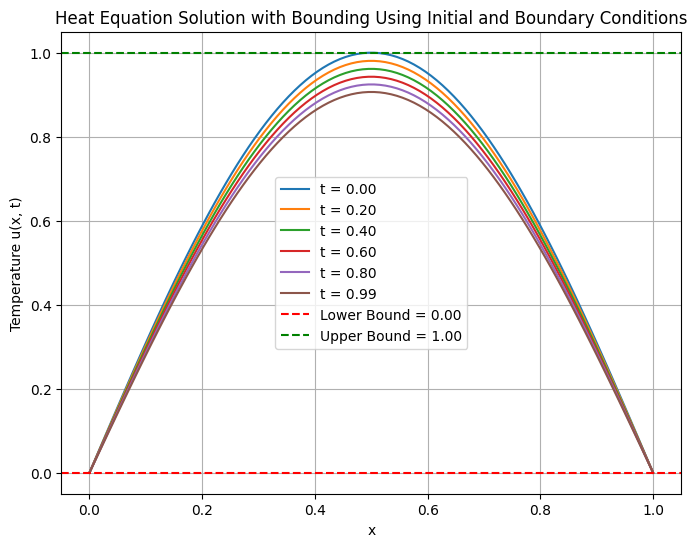

In [5]:
## using initial and boundary conditions

import numpy as np
import matplotlib.pyplot as plt

def solve_heat_equation_with_bounds(L=1.0, alpha=0.01, x_points=100, t_points=100, T=1.0,
                                    u0=lambda x: np.sin(np.pi * x), u_left=0, u_right=0):
    """
    Solve the 1D heat equation and compute bounds based on initial and boundary conditions.
    Adjusts time step to meet stability condition if needed.
    """
    # Discretize space
    x = np.linspace(0, L, x_points)
    dx = x[1] - x[0]

    # Adjust time points to ensure stability
    r_target = 0.5
    dt = r_target * dx**2 / alpha
    t_points = int(T / dt) + 1
    t = np.linspace(0, T, t_points)

    # Compute the actual r value
    r = alpha * dt / dx**2

    # Initialize the solution matrix
    u = np.zeros((t_points, x_points))

    u[0, :] = u0(x)

    # Set boundary conditions
    u[:, 0] = u_left
    u[:, -1] = u_right

    for n in range(0, t_points - 1):
        for i in range(1, x_points - 1):
            u[n + 1, i] = u[n, i] + r * (u[n, i - 1] - 2 * u[n, i] + u[n, i + 1])

    max_initial = np.max(u[0, :])
    max_boundary = max(u_left, u_right)
    upper_bound = max(max_initial, max_boundary)
    lower_bound = min(np.min(u[0, :]), min(u_left, u_right))

    return x, t, u, (lower_bound, upper_bound)

L = 1.0
alpha = 0.01
x_points = 100
t_points = 100
T = 1.0

# Initial condition: sin(pi * x)
initial_condition = lambda x: np.sin(np.pi * x)
u_left_boundary = 0  # Boundary condition at x=0
u_right_boundary = 0  # Boundary condition at x=L

x, t, u, bounds = solve_heat_equation_with_bounds(L, alpha, x_points, t_points, T,
                                                  u0=initial_condition,
                                                  u_left=u_left_boundary,
                                                  u_right=u_right_boundary)

plt.figure(figsize=(8, 6))
for n in range(0, len(t), max(1, len(t) // 5)):
    plt.plot(x, u[n, :], label=f"t = {t[n]:.2f}")

plt.axhline(bounds[0], color='red', linestyle='--', label=f"Lower Bound = {bounds[0]:.2f}")
plt.axhline(bounds[1], color='green', linestyle='--', label=f"Upper Bound = {bounds[1]:.2f}")

plt.title("Heat Equation Solution with Bounding Using Initial and Boundary Conditions")
plt.xlabel("x")
plt.ylabel("Temperature u(x, t)")
plt.legend()
plt.grid(True)
plt.show()

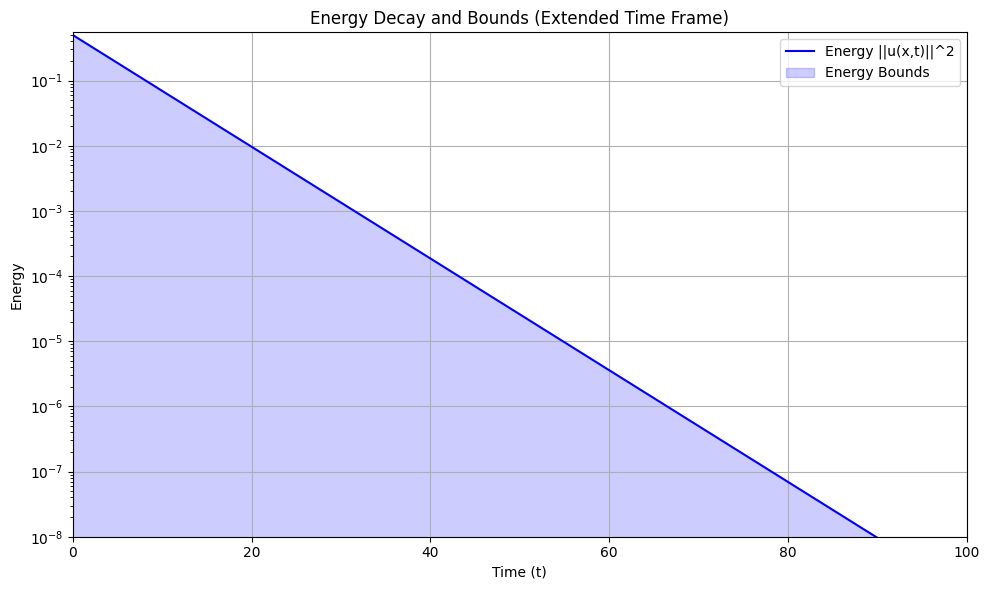

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def solve_heat_equation_energy_bounds(L, alpha, x_points, t_points, T, u0, u_left, u_right):
    """
    Solve the 1D heat equation and calculate energy-based bounds using the energy method.

    Parameters:
        L (float): Length of the domain.
        alpha (float): Thermal diffusivity.
        x_points (int): Number of spatial points.
        t_points (int): Number of time points.
        T (float): Total time duration.
        u0 (callable): Initial condition function, u(x, 0).
        u_left (float): Boundary condition at x=0.
        u_right (float): Boundary condition at x=L.

    Returns:
        x, t, u, energy: Spatial points, time points, solution matrix, and energy at each time step.
    """
    dx = L / (x_points - 1)
    dt = T / (t_points - 1)
    r = alpha * dt / dx**2

    if r > 0.5:
        raise ValueError(f"Stability condition not met: r = {r} > 0.5")

    # Discretize space and time
    x = np.linspace(0, L, x_points)
    t = np.linspace(0, T, t_points)
    u = np.zeros((t_points, x_points))

    # Initial and boundary conditions
    u[0, :] = u0(x)
    u[:, 0] = u_left
    u[:, -1] = u_right

    # Time stepping (FTCS scheme)
    for n in range(0, t_points - 1):
        for i in range(1, x_points - 1):
            u[n + 1, i] = u[n, i] + r * (u[n, i - 1] - 2 * u[n, i] + u[n, i + 1])

    # Calculate energy
    energy = np.array([np.trapz(u[n, :]**2, x) for n in range(t_points)])

    return x, t, u, energy

L = 1.0
alpha = 0.01
x_points = 100
t_points = 50000
T = 100.0

# Define initial and boundary conditions
initial_condition = lambda x: np.sin(np.pi * x)  # Initial condition: sin(pi * x)
u_left_boundary = 0.0  # Boundary condition at x=0
u_right_boundary = 0.0  # Boundary condition at x=L

# Solve the heat equation
x, t, u, energy = solve_heat_equation_energy_bounds(L, alpha, x_points, t_points, T,
                                                    u0=initial_condition,
                                                    u_left=u_left_boundary,
                                                    u_right=u_right_boundary)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(t, energy, label="Energy ||u(x,t)||^2", color='blue')
ax.set_title("Energy Decay and Bounds (Extended Time Frame)")
ax.set_xlabel("Time (t)")
ax.set_ylabel("Energy")

ax.fill_between(t, 0, energy, color='blue', alpha=0.2, label="Energy Bounds")
ax.set_yscale('log')  # Log scale for exponential decay visualization
ax.set_ylim(1e-8, max(energy) * 1.1)
ax.set_xlim(0, T)
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

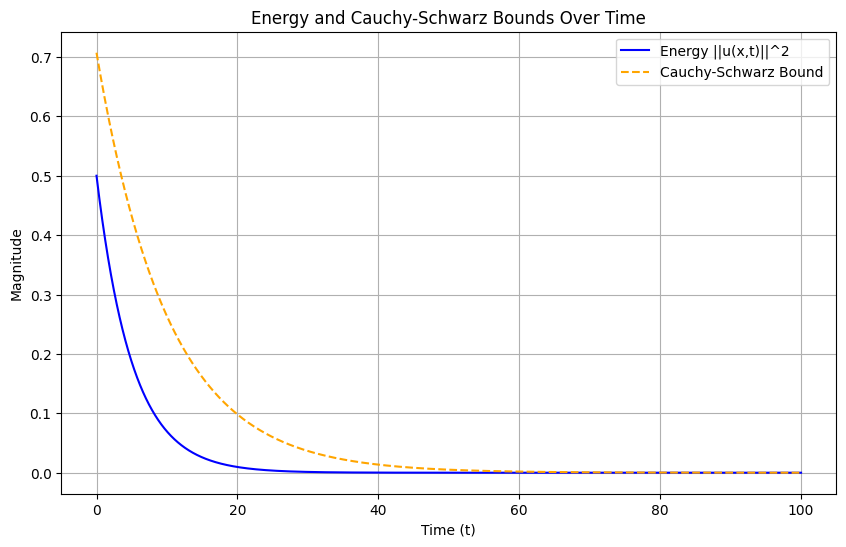

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def solve_heat_equation_with_cauchy_schwarz(L=1.0, alpha=0.01, x_points=100, t_points=100, T=1.0,
                                            u0=lambda x: np.sin(np.pi * x), u_left=0, u_right=0):
    """
    Solve the 1D heat equation and compute bounds using the Cauchy-Schwarz inequality.

    Parameters:
        L (float): Length of the rod.
        alpha (float): Thermal diffusivity.
        x_points (int): Number of spatial points.
        t_points (int): Number of time points.
        T (float): Total time.
        u0 (function): Initial condition function f(x) defined on [0, L].
        u_left (float): Boundary condition at x=0.
        u_right (float): Boundary condition at x=L.

    Returns:
        x (np.ndarray): Spatial points.
        t (np.ndarray): Time points.
        u (np.ndarray): Solution array u(x, t).
        energy (np.ndarray): Energy ||u(x, t)||^2 over time.
        bounds (np.ndarray): Array of bounds derived using Cauchy-Schwarz.
    """
    # Discretize space and time
    x = np.linspace(0, L, x_points)
    dx = x[1] - x[0]
    dt = T / (t_points - 1)
    t = np.linspace(0, T, t_points)

    # Stability condition
    r = alpha * dt / dx**2
    if r > 0.5:
        raise ValueError(f"Stability condition not met: r = {r} > 0.5")

    # Initialize the solution matrix
    u = np.zeros((t_points, x_points))

    # Set the initial condition
    u[0, :] = u0(x)

    # Set boundary conditions
    u[:, 0] = u_left
    u[:, -1] = u_right

    # Time-stepping to solve the heat equation
    for n in range(0, t_points - 1):
        for i in range(1, x_points - 1):
            u[n + 1, i] = u[n, i] + r * (u[n, i - 1] - 2 * u[n, i] + u[n, i + 1])

    # Compute energy and bounds using Cauchy-Schwarz
    energy = np.array([np.sum(u[n, :]**2) * dx for n in range(t_points)])  # Energy ||u(x, t)||^2
    bounds = np.sqrt(energy)  # Cauchy-Schwarz: ||u v|| ≤ ||u|| ||v||

    return x, t, u, energy, bounds


# Define parameters
L = 1.0
alpha = 0.01
x_points = 50
t_points = 10000
T = 100.0

# Initial condition: sin(pi * x)
initial_condition = lambda x: np.sin(np.pi * x)
u_left_boundary = 0  # Boundary condition at x=0
u_right_boundary = 0  # Boundary condition at x=L

# Solve the heat equation
x, t, u, energy, bounds = solve_heat_equation_with_cauchy_schwarz(L, alpha, x_points, t_points, T,
                                                                  u0=initial_condition,
                                                                  u_left=u_left_boundary,
                                                                  u_right=u_right_boundary)

# Plot the superposed graph
plt.figure(figsize=(10, 6))
plt.plot(t, energy, label="Energy ||u(x,t)||^2", color='blue')
plt.plot(t, bounds, label="Cauchy-Schwarz Bound", linestyle='--', color='orange')
plt.title("Energy and Cauchy-Schwarz Bounds Over Time")
plt.xlabel("Time (t)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)
plt.show()
